# Time Series 1 - Data Wrangling Exercise

# Part 0:  Setup your environment

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## pandas print columns/rows option (100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

## set the styling for seaborn (white)
sns.set_style("dark")

In [52]:
%matplotlib inline

# Part 1: Bring in the dataset

The dataset is `simpsons-ratings.csv` on QuestromTools under session 8

In [10]:
dd = pd.read_csv("/Users/Kyle_Staples/Documents/GitHub/IS834/datasets/simpsons-ratings-1.csv")

In [11]:
dd.head()

,1989-12-17,1990-01-14,1990-01-21,1990-01-28,1990-02-04,1990-02-11,1990-02-18,1990-02-25,1990-03-18,1990-03-25,1990-04-15,1990-04-29,1990-05-13,1990-10-11,1990-10-18,1990-10-25,1990-11-01,1990-11-08,1990-11-15,1990-11-22,1990-12-06,1990-12-20,1991-01-10,1991-01-24,1991-01-31,1991-02-07,1991-02-14,1991-02-21,1991-03-07,1991-03-28,1991-04-11,1991-04-25,1991-05-02,1991-05-09,1991-08-11,1991-09-19,1991-09-26,1991-10-03,1991-10-10,1991-10-17,1991-10-24,1991-10-31,1991-11-07,1991-11-14,1991-11-21,1991-12-05,1991-12-26,1992-01-09,1992-01-23,1992-02-06,...,2016-12-04,2016-12-11,2017-01-08,2017-01-15,2017-02-12,2017-02-19,2017-03-05,2017-03-12,2017-03-19,2017-04-02,2017-04-30,2017-05-07,2017-05-21,2017-10-01,2017-10-08,2017-10-15,2017-10-22,2017-11-05,2017-11-12,2017-11-19,2017-12-03,2017-12-10,2018-01-07,2018-01-14,2018-03-11,2018-03-18,2018-03-25,2018-04-01,2018-04-15,2018-04-22,2018-04-29,2018-05-06,2018-05-13,2018-08-31,2018-10-01,2018-10-04,2018-10-07,2018-11-01,2018-11-04,2018-11-05,2018-11-08,2018-12-02,2018-12-09,2019-01-03,2019-01-06,2019-01-31,2019-02-07,2019-02-28,2019-03-03,2019-03-07
0,8.2,7.8,7.5,7.8,8.1,7.6,7.9,7.8,7.5,7.4,7.9,8.4,7.8,8.2,8.3,8.3,8.1,7.5,8,7.8,8.4,8.1,7.8,8.8,8.3,8,7.5,8.3,7.5,7.7,8,8.6,7.9,8.4,8,8.6,7.8,8.2,8.7,8.5,7.7,8.3,7.9,8,8.8,8.3,8.3,8.5,8,8.1,...,6.6,6.1,7.1,6.6,6.6,6.7,6.8,7.2,6.4,7.1,6.4,6.7,6.7,6.9,6.7,6.4,7.3,6.5,6.6,6.6,7,7.5,6.9,6.3,6.8,6.7,6.6,6.3,6.6,7.1,7.3,6.8,7.8,6.4,6.1,6.2,6.2,6.8,7.1,6.8,6.3,7,7,6.7,6.1,7.1,6.4,5.9,6.6,6.8


# Part 2:  Put the Dataset into a Timeseries Format

In [60]:
dd2 = dd.melt()
dd2.head(1)

,variable,value
0,1989-12-17,8.2


In [19]:
dd2['date'] = pd.to_datetime(dd2['variable'], format="%Y-%m-%d")

# Part 3:  Calculate the average rating for each date

In [39]:
dd2.groupby('date').mean().head().sort_values('value', ascending = False)

,value
date,
1989-12-17,8.2
1990-02-04,8.1
1990-01-14,7.8
1990-01-28,7.8
1990-01-21,7.5


# Part 4:  Ensure that the date is datetime

Using the average ratings by date we just created, ensure that the date is a datetime field

In [46]:
dd2.dtypes

variable            object
value              float64
date        datetime64[ns]
dtype: object

# Part 5:  Which year had the highest average rating?

In [48]:
dd2.groupby('date').mean().head().sort_values('value', ascending = False)

,value
date,
1989-12-17,8.2
1990-02-04,8.1
1990-01-14,7.8
1990-01-28,7.8
1990-01-21,7.5


In [57]:
dd2.rename(columns={"value":"Episode Rating", "date":"Episode Date"}, inplace = True)

# Part 6:  Plot the ratings over time

Plot the rating (y) by date (x) and with the following properties:

xaxis = "Episode Date"  

y axis = "Episode Rating"  

Title = "Simpsons Episode Ratings"  


Text(0.5, 1.0, 'Simpsons Episode Ratings')

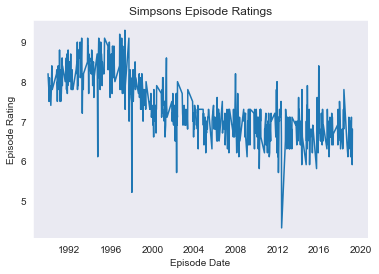

In [59]:
sns.lineplot(x="Episode Date", y="Episode Rating", data=dd2).set_title("Simpsons Episode Ratings")